# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


## Откройте таблицу и изучите общую информацию о данных

## Импорт библиотек

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_floor(floor):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= floor <= 50000:
            return 'D'
        elif 50001 <= floor <= 200000:
            return 'C'
        elif 200001 <= floor <= 1000000:
            return 'B'
        elif floor >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_floor)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
#ch_debt = data.groupby('children').agg({'debt':'mean'}).reset_index() #зависимость среднего значения задолжников от кол-ва детей
#ch_debt['debt'] = ch_debt['debt']*100 #переводим значение задолжников в проценты
#ch_debt #выводим таблицу

ch_debt=data.pivot_table(index='children', values='debt', aggfunc=['count', 'mean', 'sum']).reset_index().droplevel(1, axis=1) #зависимость среднего значение задолжников от кол-ва детей
ch_debt['mean'] = ch_debt['mean']*100 #переводим значение задолжников в проценты
ch_debt #выводим таблицу

,children,count,mean,sum
0,0,14091,7.543822,1063
1,1,4808,9.234609,444
2,2,2052,9.454191,194
3,3,330,8.181818,27
4,4,41,9.756098,4
5,5,9,0.000000,0


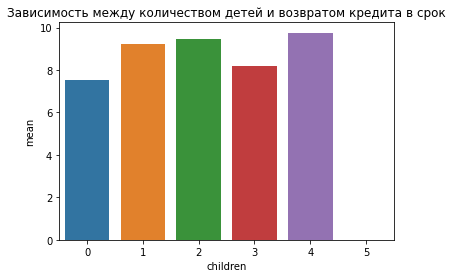

In [23]:
sns.barplot(x='children', y='mean', data=ch_debt).set(title='Зависимость между количеством детей и возвратом кредита в срок'); 
# построение гистограммы 

Выборка не сбалансированна: клиентов с 3-5 детьми слишком мало, чтобы делать какие-либо выводы. 
Процент различия факта возврата кредита клиентами без детей и клинтами с 1-2 детьми: 

In [24]:
a = ch_debt.loc[1:2, 'mean'].mean() #среднее значение задолжников для людей с детьми, берем лишь для 1-2 детей, т.к. кол-во данных больше и вывод будет точнее
b = ch_debt.loc[0, 'mean'] #среднее значение задолжников для людей без детей
a - b #процент различия задолжников

1.8005777111610204

Вероятность возвращения клиентом кредита в срок при наличие 1-2 детей уменьшается на 1,8%

**Вывод:** 
-  Люди без детей берут кредит чаще. Вероятность возвращения клиентом кредита в срок при наличие детей уменьшается в среднем на **1,8%**.

-  Люди, которые не имеют детей, лучше всего отдают кредит, доля должников здесь составляет с **7,5%**, хуже обстоит дело с кредиторами, кто имеет одного или двух детей, здесь доля невозврата составляет соответственно **9,2% и 9,4%**. 
-  Остальные категории уже некорректно сравнивать, так как среди них очень маленькая выборка

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
#data.groupby('family_status')['family_status_id'].unique() #взаимосвязь family_status_id и family_status

In [26]:
#создаю таблицу зависимости семейного положения от возврата кредита в срок
family_debt=data.pivot_table(index='family_status', values='debt', aggfunc=['count', 'mean', 'sum']).reset_index().droplevel(1, axis=1).sort_values('mean')
family_debt['mean'] = family_debt['mean']*100 #перевожу среднее значение debt в проценты для удобства просмотра результатов
family_debt #вывожу таблицу


,family_status,count,mean,sum
2,вдовец / вдова,951,6.624606,63
1,в разводе,1189,7.064760,84
4,женат / замужем,12261,7.560558,927
3,гражданский брак,4134,9.313014,385
0,Не женат / не замужем,2796,9.763948,273


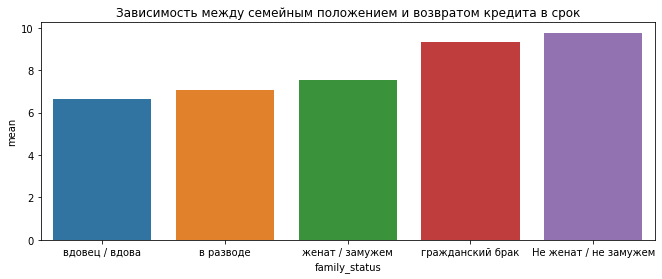

In [27]:
fig, ax = plt.subplots(figsize=(11, 4)) #расширяю график для удобства просмотра
sns.barplot(x="family_status", y='mean',  data=family_debt, ax=ax, errwidth=0).set(title='Зависимость между семейным положением и возвратом кредита в срок');
plt.show()

Зачастую в кредите нуждаются люди в браке, но в срок возвращают чаще вдовцы и те, кто в разведе.
Посмотрю, есть ли взаимосвязь между целью взятия кредита и семейным статусом клиента.

**Частота взятия кредита от семейного статуса и цели**

In [28]:
family_purpose_debt = data.groupby(['family_status','purpose_category']).agg({'purpose':'count'}).reset_index()
family_purpose_debt
pd.pivot_table(
   data=family_purpose_debt,
   index='purpose_category',
   columns='family_status',
   )

purpose                           \
family_status            Не женат / не замужем в разводе вдовец / вдова   
purpose_category                                                          
операции с автомобилем                   635.0     279.0          218.0   
операции с недвижимостью                1586.0     672.0          535.0   
получение образования                    575.0     238.0          198.0   
проведение свадьбы                         NaN       NaN            NaN   

                                                           
family_status            гражданский брак женат / замужем  
purpose_category                                           
операции с автомобилем              430.0          2717.0  
операции с недвижимостью            988.0          6970.0  
получение образования               403.0          2574.0  
проведение свадьбы                 2313.0             NaN

**Среднее значение возврата кредита в зависимости от семейного статуса и цели**

In [29]:
pd.pivot_table(
    data=data,
    index='purpose_category',
    columns='family_status',
    values='debt',
    aggfunc='mean')

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
purpose_category,,,,,
операции с автомобилем,0.129134,0.075269,0.091743,0.118605,0.083180
операции с недвижимостью,0.081337,0.068452,0.052336,0.092105,0.069727
получение образования,0.107826,0.071429,0.075758,0.148883,0.083528
проведение свадьбы,NaN,NaN,NaN,0.079118,NaN


In [30]:
family_children = data.groupby(['family_status','children']).agg({'debt':'mean'}).reset_index()
family_children
pd.pivot_table(
   data=family_children,
   index='children',
   columns='family_status',
   )

debt                                            \
family_status Не женат / не замужем в разводе вдовец / вдова гражданский брак   
children                                                                        
0                          0.092838  0.070153       0.062574         0.083883   
1                          0.115813  0.067308       0.090909         0.118593   
2                          0.120000  0.086420       0.150000         0.087464   
3                          0.125000  0.090909       0.000000         0.142857   
4                          0.500000  0.000000       0.000000         0.000000   
5                               NaN       NaN            NaN         0.000000   

                               
family_status женат / замужем  
children                       
0                    0.069095  
1                    0.082689  
2                    0.094586  
3                    0.068273  
4                    0.103448  
5                    0.000000

In [31]:
widowers = family_debt.loc[2, 'count'] #количество вдовцов в выборке
divorcee = family_debt.loc[1, 'count'] #количество людей в разводе в выборке
all_people = family_debt.loc[:, 'count'].sum() #общее кол-во клиентов
pr_widowers = widowers/all_people*100 #процент количества вдовцов в выборке
pr_divorcee = divorcee/all_people*100 #процент количествa людей в разводе в выборке
print('процент количества вдовцов в выборке', pr_widowers)
print('процент количествa людей в разводе в выборке', pr_divorcee)

процент количества вдовцов в выборке 4.4583001265763444
процент количествa людей в разводе в выборке 5.574047161408279


**Вывод** 
-  В среднем вдовцы, люди в разводе и женатые отдают кредит лучше - доля невозврата соответственно **6,6%, 7% и 7.5%** 
Люди, находящиеся в гражданском браке и неженатые отдают кредит хуже - доля невозврата соответственно **9.3% и 9.8%** 

-  Если же рассмотреть взаимосвязь семейного статуса и количества имеющихся у клиентов детей, - заметно, что отсутствие детей улучшает показатели возврата кредита. К примеру, доля невозврата женатых людей, как написано выше, - **7,5%** , доля невозврата женатых людей без детей уже **6.9%**.

-  Люди, вне зависимости от семейного положения, чаще берут кредит на операции с недвижимостью и операции с автомобилем. 
За исключением тех, кто находится в гражданском браке: для них основная цель кредита - свадьба, и кредит на свадьбу они возвращают лучше, чем по другим целям. 

-  **Показатели по вдовцам и людям в разводе могут быть неточными, так как их доля в выборке составляет 4.5% и 5.6% соответственно.**  


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
income_debt=data.pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'mean', 'sum']).reset_index().droplevel(1, axis=1).sort_values('mean')
income_debt['mean'] = income_debt['mean']*100 #перевожу среднее значение debt в проценты для удобства просмотра результатов
income_debt #вывожу таблицу

,total_income_category,count,mean,sum
3,D,349,6.017192,21
1,B,5014,7.060231,354
0,A,25,8.000000,2
2,C,15921,8.498210,1353
4,E,22,9.090909,2


0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

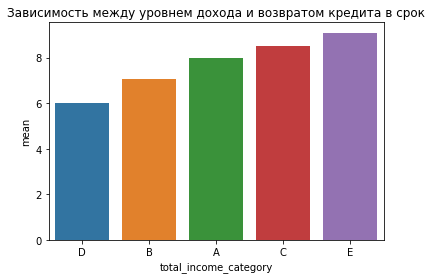

In [38]:
sns.barplot(x='total_income_category', y='mean',  data = income_debt).set(title='Зависимость между уровнем дохода и возвратом кредита в срок');
plt.show()

In [37]:
category_a = income_debt.loc[0, 'count'] #количество людей категории А в выборке
category_d = income_debt.loc[3, 'count'] #количество людей категории D в выборке
category_e = income_debt.loc[4, 'count'] #количество людей категории E в выборке
category_c = income_debt.loc[2, 'count'] #количество людей категории С в выборке
pr_category_a = category_a/all_people*100 #процент количества людей категории А в выборке
pr_category_d = category_d/all_people*100 #процент количества людей категории D в выборке
pr_category_e = category_e/all_people*100 #процент количества людей категории E в выборке
pr_category_c = category_c/all_people*100 #процент количества людей категории C в выборке
print('процент количества людей категории А в выборке', pr_category_a)
print('процент количества людей категории D в выборке', pr_category_d)
print('процент количества людей категории E в выборке', pr_category_e)
print('процент количества людей категории C в выборке', pr_category_c)

процент количества людей категории А в выборке 0.11720031878486709
процент количества людей категории D в выборке 1.6361164502367447
процент количества людей категории E в выборке 0.10313628053068304
процент количества людей категории C в выборке 74.63785101495476


**Вывод:** 
-  Клиентов с категориями A,D,E - слишком мало, чтобы делать какие-то выводы, процент количества людей данных категорий в выборке соответсвенно: **0.1%, 1.6%, 0.1%**. 

-  Если сравнивать только клиентов категории В и С, лучше возвращают кредит люди с доходом категории В (диапозоне 200001–1000000) - доля невозврата **7.1%**. 

-  Большинство клиентов банка  - люди с доходом категорий 'C'(в диапозоне 50001–200000), это 74% всех клиентов, доля невозврата среди них **8.5%**.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [40]:
purpose_debt=data.pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'mean', 'sum']).reset_index().droplevel(1, axis=1).sort_values('mean')
purpose_debt['mean'] = purpose_debt['mean']*100 #перевожу среднее значение debt в проценты для удобства просмотра результатов
purpose_debt

,purpose_category,count,mean,sum
1,операции с недвижимостью,10751,7.255139,780
3,проведение свадьбы,2313,7.911803,183
2,получение образования,3988,9.252758,369
0,операции с автомобилем,4279,9.347978,400


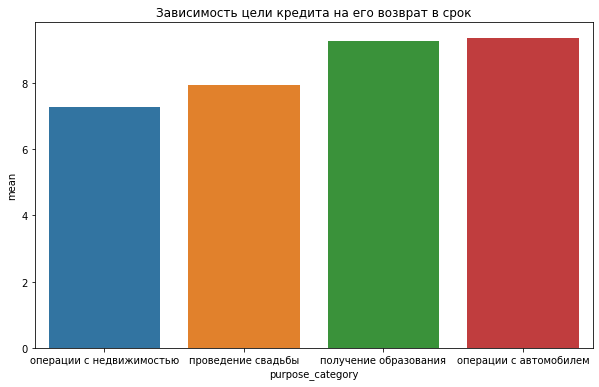

In [45]:
fig, ax = plt.subplots(figsize=(10, 6)) #расширяю график для удобства просмотра

sns.barplot(x='purpose_category', y='mean',  data = purpose_debt).set(title='Зависимость цели кредита на его возврат в срок');
plt.show()

**Вывод:** Клиенты, цель которых являются операции с недвижимостью - возвращают кредит лучше остальных: доля невозврата **7,3%**.
Также хорошие показатели у клиентов, которые берут кредит на свадьбу, доля невозврата **7,9%**.
Хуже с такими целями как: получание образования и операции с автомобилем, доля невозврата по **9.3%**.

Вероятно, кредит на операции с недвижимостью возвращают лучше, так как требования к заемщикам выше. В свою очередь заемщики, возможно, относятся к данной цели с большей ответсвенностью из-за крупной суммы кредита.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в столбце с доходами вероятно из-за того, что при определенных условиях банк выдает кредит без подтверждения дохода. 
Так как количество пропусков в столбце трудового стажа совпадает с пропусками в столбце доходов, ситауция аналогичная: если нет необходимости подтвержать доход, то и информация по трудовому стажу не имеет значения. 


Но скорее всего ошибка носит технический характер. Чтобы узнать точную причину - лучше обратиться к ответсвенным за исходные данные. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Распределение Парето - является степенным распределением вероятностей, которое используется при описании многих типов наблюдаемых явлений. Принцип Парето или "правило 80-20", утверждающий, что 80% результатов обусловлены 20% причин. 

Соблюдение принципа 80/20 очень часто встречается в самых разных областях. Например, во многие времена во многих сообществах оказывалось, что 20 % людей обладают 80 % капитала, в бизнесе зачастую 20 % покупателей или постоянных клиентов приносят 80 % прибыли. Но в этих утверждениях фундаментальными являются не приведённые числовые значения, а сам факт их существенного различия, конкретные цифры степени неравномерности могут быть любыми.

Так как распределение количественных переменных обычно неравномерно, то среднее значение - покажет ложный результат, именно поэтому нужно брать медианное значение. 

### Шаг 4: общий вывод.

-  Клиенты без детей в среднем на 1,8% чаще возвращают кредит в срок.
-  Клиенты в браке в среднем на 2% чаще возвращают кредит в срок, чем неженатые и находящиеся в гражданском браке.
-  Клиенты с доходом категории В (в диапазоне 200001–1000000) в среднем чаще возвращают кредит в срок - доля невозврата среди них 7.1%
-  Клиенты, цель которых являются операции с недвижимостью - в среднем возвращают кредит лучше остальных: доля невозврата 7,3%


- В данных присутствует большое количество пропусков в столбцах с доходом и трудовым стажем, что влияет на точность конечных результатов анализа. Также в столбце с трудовым стажем присутствуют аномально большие значения у безработных и пенсионеров. Следует обратить внимание на качество сбора этих данных.  
- Можно было бы добиться более точных результатов анализа, если бы для различных 'редких' категорий клиентов (клиенты с 3-5 детьми, клиенты с доходами категорий A,D,E; клиенты в разводе/вдовцы) - было бы специально подобранно примерно одинаковое количество данных для выборки в сравнении с более "популярными" категориями. 